# PCA: Paso a paso con Python

El análisis de componentes principales, o PCA, es un método para reducir la dimensionalidad de los datos.

Puede considerarse un método de proyección en el que los datos con m columnas (características) se proyectan en un subespacio con m o menos columnas, conservando la esencia de los datos originales.

El método PCA puede describirse e implementarse utilizando las herramientas del álgebra lineal.

El PCA es una operación aplicada a un conjunto de datos, representado por una matriz A de n x m, que da como resultado una proyección de A que llamaremos B. Recorramos los pasos de esta operación.

# Resumen del enfoque del PCA


A continuación se enumeran los 6 pasos generales para realizar un análisis de componentes principales, que investigaremos en las siguientes secciones:



1.   Tomamos el conjunto de datos compuesto por muestras d-dimensionales ignorando las etiquetas de clase
2.   Calculamos el vector de medias d-dimensionales (es decir, las medias de cada dimensión del conjunto de datos)
3.  Calculamos la matriz de dispersión (o la matriz de covarianza) del conjunto de datos
4. Calculamos los eigenvector  y los correspondientes eigenvalues
5. Ordenamos los eigenvectores por eigenvalues decrecientes y elegimos k eigenvectores con los mayores eigenvalues para formar una matriz d×k dimensional WW(donde cada columna representa un eigenvector)
6. Utilice esta matriz de d×k eigenvectores para transformar las muestras en el nuevo subespacio. Esto puede resumirse en la ecuación matemática: yy=WT×xx (donde xx es un vector d×1 dimensional que representa una muestra, e yy es la muestra transformada k×1 dimensional en el nuevo subespacio).



# Generamos datos con 3 variables (dimensiones)

Para el siguiente ejemplo, generaremos 40 muestras tridimensionales extraídas aleatoriamente de una distribución gaussiana multivariante.
Supondremos que las muestras proceden de dos clases diferentes, donde una mitad (es decir, 20) de las muestras de nuestro conjunto de datos se etiquetan como ω1 (clase 1) y la otra mitad como ω2 (clase 2).

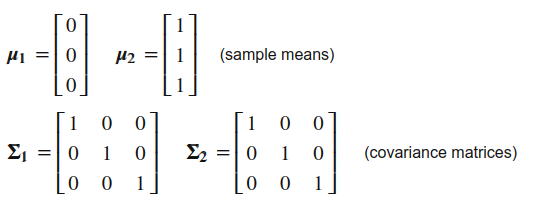

In [ ]:
import numpy as np

np.random.seed(123456) # random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Así el dataset tiene la forma:
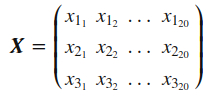

Pintamos los datos en un scatter plot con 3d:

Populating the interactive namespace from numpy and matplotlib


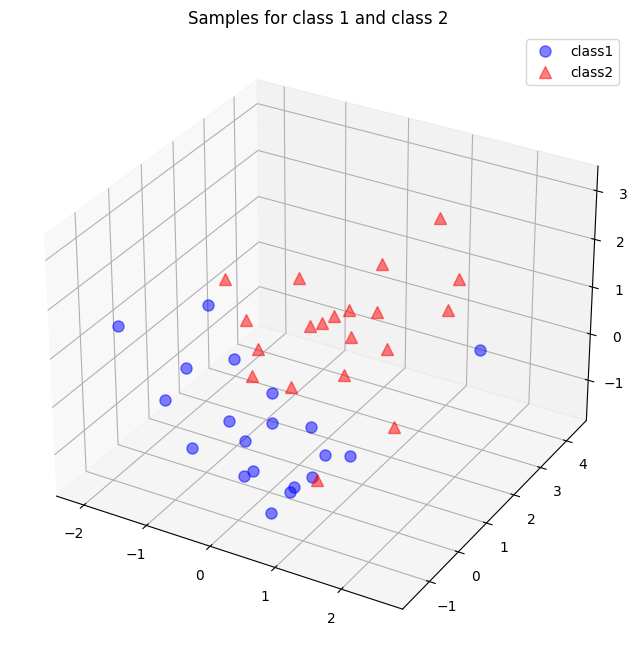

In [ ]:
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

# 1. Juntamos todos los datos ignornado las etiquetas de las clases

In [ ]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()n_componentsn_componen_componentsnts
# all_samples = scaler.fit_transform(all_samples)

# 2. Calculamos las medias de las variables


In [ ]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.30316883]
 [0.43212016]
 [0.42702249]]


In [ ]:
# scatter_matrix = np.zeros((3,3))
# for i in range(all_samples.shape[1]):
#     scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
# print('Scatter Matrix:\n', scatter_matrix)

# 3. Calculamos la matriz de covarianzas

La variabilidad de los datos y la información relativa a las relaciones lineales entre las variables se resumen en la matriz de varianzas y covarianzas.



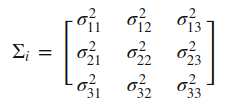

In [ ]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.00267023 0.25453853 0.3284653 ]
 [0.25453853 1.57443976 0.32005415]
 [0.3284653  0.32005415 1.81498158]]


# 4. Calculamos los eigenvector  y los correspondientes eigenvalues

In [ ]:
# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

## Comprobamos el cálculo de los eigenvector y eigenvalue

Comprobamos que el cálculo es correcto y satisface la ecuación:

image.png

donde:

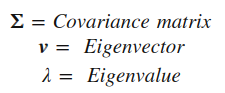



In [ ]:
for i in range(len(eig_val_cov)):
    eigv = eig_vec_cov[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(cov_mat.dot(eigv), eig_val_cov[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

### Visualizamos los eigenvectors

Antes de pasar al siguiente paso vamos a echar un vistazo a los eigenvectors

In [ ]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

#all_samples = scaler.inverse_transform(all_samples)


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_cov.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

Populating the interactive namespace from numpy and matplotlib


AttributeError: 'Arrow3D' object has no attribute 'do_3d_projection'

<Figure size 700x700 with 1 Axes>

# 5. Ordenamos los eigenvectores por eigenvalues decrecientes

Comenzamos con el objetivo de reducir la dimensionalidad de nuestro espacio de características, es decir, proyectando el espacio de características mediante PCA en un subespacio más pequeño, donde los vectores propios formarán los ejes de este nuevo subespacio de características. Sin embargo, los vectores propios sólo definen las direcciones del nuevo eje, ya que todos tienen la misma longitud unitaria 1, lo que podemos confirmar con el siguiente código:

In [ ]:
for ev in eig_vec_cov:
    numpy.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    # instead of 'assert' because of rounding errors

Por lo tanto, para decidir qué eigenvector(es) queremos descartar para nuestro subespacio de dimensiones inferiores, tenemos que echar un vistazo a los correspondientes eigenvalores de los eigenvectores. A grandes rasgos, los eigenvectores con los eigenvalores más bajos son los que menos información aportan sobre la distribución de los datos, y esos son los que queremos descartar.
El enfoque común es ordenar los eigenvectores de mayor a menor valor propio correspondiente y elegir los k mejores eigenvectores.


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

2.1826157677076115
1.3536264198428418
0.8558493794229872


Para nuestro sencillo ejemplo, en el que reducimos un espacio de características tridimensional a un subespacio de características bidimensional, combinamos los dos eigenvectores con los valores propios más altos para construir nuestra matriz de eigenvectores d×k-dimensional WW.


In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.33188906 -0.03688073]
 [ 0.54433934 -0.80859866]
 [ 0.77041829  0.58720356]]


# 6. Transformamos las muestras al nuevo subespacio

En este último paso utilizamos la matriz W de 2 x 3  que acabamos de calcular para transformar las muestras al nuevo subespacio utilizando esta ecuación

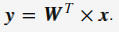


In [ ]:
transformed = matrix_w.T.dot(all_samples)
transformed = matrix_w.T.dot(all_samples - mean_vector)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

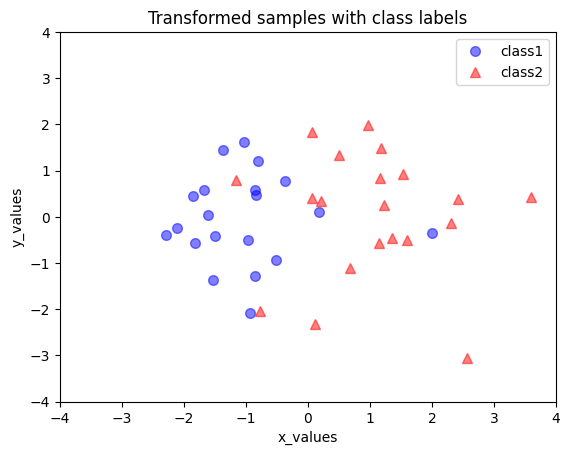

In [ ]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# Comprobación de los resultados usando PCA() DE sklearn.decomposition

Para asegurarnos de que no hemos cometido un error en nuestro enfoque paso a paso, utilizaremos otra biblioteca que no reescala los datos de entrada por defecto.
En este caso, utilizaremos la clase PCA de la biblioteca de aprendizaje de máquinas scikit-learn. La documentación se puede encontrar aquí:
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

Para nuestra comodidad, podemos especificar directamente a cuántos componentes queremos reducir nuestro conjunto de datos de entrada a través del parámetro n_componentes.

Para ejecutar la reducción de dimensionalidad necesitamos únicamente usar fit_transform:

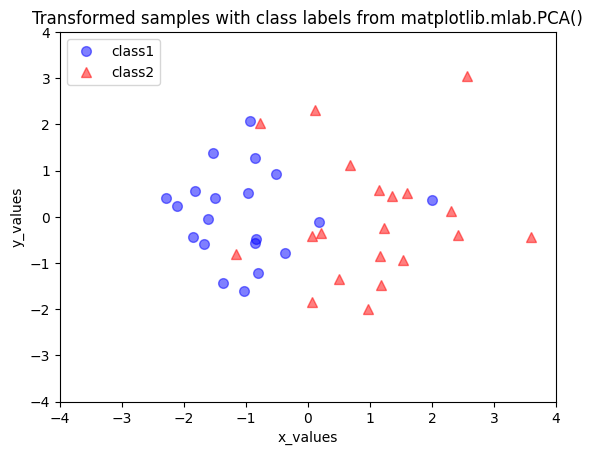

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA


sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

El gráfico anterior parece ser la imagen exacta del gráfico de nuestro enfoque paso a paso pero rotada como si estuviese reflejada en un espejo horizontal. Esto se debe al hecho de que los signos de los eigenvectores pueden ser positivos o negativos, ya que los eigenvectores se escalan a la unidad de longitud 1.

Podemos voltear la imagen multiplicando el eje y por -1.


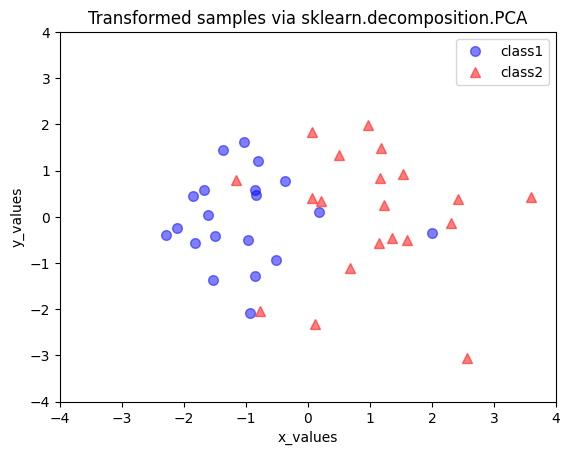

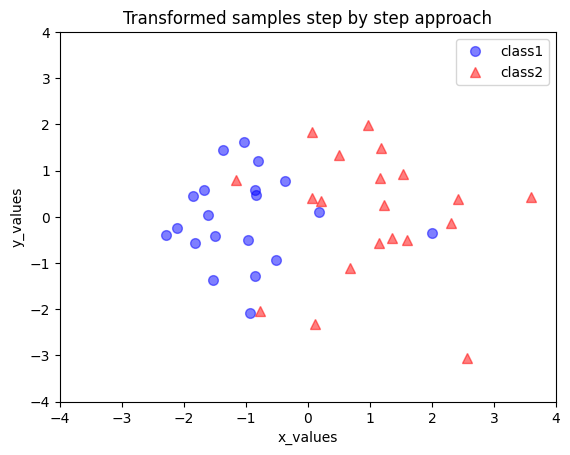

In [ ]:
sklearn_transf_flipped = sklearn_transf
sklearn_transf_flipped[:,1] = -1 * sklearn_transf_flipped[:,1]

# sklearn.decomposition.PCA
plt.plot(sklearn_transf_flipped[0:20,0],sklearn_transf_flipped[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf_flipped[20:40,0], sklearn_transf_flipped[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()


# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()